In [1]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
import pandas as pd

In [2]:
imagenet_classes = pd.read_json(r"C:\Users\phani\OneDrive\Trainings\IP Training AI\AI and Deep Learning using TensorFLow\Module 5\In-Class Demo\imagenet_class_index.json")
imagenet_classes = imagenet_classes.T[[1]]
imagenet_classes.columns = ["Class"]
imagenet_classes

,Class
0,tench
1,goldfish
2,great_white_shark
3,tiger_shark
4,hammerhead
...,...
995,earthstar
996,hen-of-the-woods
997,bolete
998,ear


In [3]:
pretrained_model = VGG16()

In [4]:
pretrained_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

### Generate Predictions - using the pretrained model 

In [5]:
imagenet_classes.head(10)

,Class
0,tench
1,goldfish
2,great_white_shark
3,tiger_shark
4,hammerhead
5,electric_ray
6,stingray
7,cock
8,hen
9,ostrich


In [6]:
from keras.preprocessing.image import load_img
import numpy as np

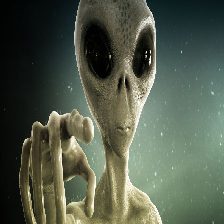

In [7]:
image_for_classification = load_img(path = r"C:\Users\phani\OneDrive\Trainings\IP Training AI\AI and Deep Learning using TensorFLow\Module 5\In-Class Demo\images_to_test\Aliens.jpg",
                                    target_size=(224,224))
image_for_classification

In [8]:
image_for_classification = np.array(image_for_classification)
image_for_classification = preprocess_input(image_for_classification)
image_for_classification = image_for_classification.reshape(1, 224, 224, 3)

In [42]:
preds = pretrained_model.predict(image_for_classification)
imagenet_classes["probability"] = np.round(preds.flatten(), 3)
imagenet_classes.sort_values(by="probability", ascending=False)

,Class,probability
616,knot,0.137
144,pelican,0.105
390,eel,0.084
600,hook,0.074
562,fountain,0.072
...,...,...
367,chimpanzee,0.000
368,gibbon,0.000
369,siamang,0.000
370,guenon,0.000


### Finetuning the model

Fintenune the model to predict Cars/Planes

In [56]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from tensorflow.keras.metrics import AUC
import glob

In [23]:
baseline_model = Sequential()

for layer in pretrained_model.layers[:-1]: #All layers except the last one
    layer.trainable = False
    baseline_model.add(layer)

baseline_model.add(Dense(1, activation='sigmoid')) # Adding an output layer for binary class classification

In [24]:
pretrained_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [25]:
baseline_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [30]:
cars = r"C:\Users\phani\OneDrive\Trainings\IP Training AI\AI and Deep Learning using TensorFLow\Module 5\In-Class Demo\archive\ImagesToTest\ImagesToTrain\Cars\*"
planes = r"C:\Users\phani\OneDrive\Trainings\IP Training AI\AI and Deep Learning using TensorFLow\Module 5\In-Class Demo\archive\ImagesToTest\ImagesToTrain\Planes\*"

In [34]:
x_train = list()
y_train = list()

for img_path in glob.glob(cars):
    input_image = load_img(img_path, target_size=(224,224))
    input_image = np.array(input_image)
    input_image = preprocess_input(input_image)
    x_train.append(input_image)
    y_train.append(0) # Cars : 0

for img_path in glob.glob(planes):
    input_image = load_img(img_path, target_size=(224,224))
    input_image = np.array(input_image)
    input_image = preprocess_input(input_image)
    x_train.append(input_image)
    y_train.append(1) # Planes : 1

In [37]:
x_train = np.array(x_train)
y_train = np.array(y_train)

In [38]:
x_train.shape

(100, 224, 224, 3)

In [58]:
baseline_model.compile(optimizer="adam", loss="binary_crossentropy", metrics = ["accuracy", AUC(curve="PR")])
baseline_model.fit(x=x_train, y=y_train, epochs=5, validation_split=0.2, shuffle=True)

Epoch 1/5
3/3 [==============================] - 10s 3s/step - loss: 5.3060e-06 - accuracy: 1.0000 - auc_1: 1.0000 - val_loss: 0.0013 - val_accuracy: 1.0000 - val_auc_1: 1.0000
Epoch 2/5
3/3 [==============================] - 9s 3s/step - loss: 2.0957e-06 - accuracy: 1.0000 - auc_1: 1.0000 - val_loss: 4.1918e-04 - val_accuracy: 1.0000 - val_auc_1: 1.0000
Epoch 3/5
3/3 [==============================] - 9s 3s/step - loss: 9.5958e-07 - accuracy: 1.0000 - auc_1: 1.0000 - val_loss: 2.8735e-04 - val_accuracy: 1.0000 - val_auc_1: 1.0000
Epoch 4/5
3/3 [==============================] - 9s 3s/step - loss: 4.2498e-07 - accuracy: 1.0000 - auc_1: 1.0000 - val_loss: 2.6372e-04 - val_accuracy: 1.0000 - val_auc_1: 1.0000
Epoch 5/5
3/3 [==============================] - 9s 3s/step - loss: 2.2173e-07 - accuracy: 1.0000 - auc_1: 1.0000 - val_loss: 2.6464e-04 - val_accuracy: 1.0000 - val_auc_1: 1.0000


### Test Finetuned Model

- 0 - Car
- 1 - Plane

In [53]:
img = r"C:\Users\phani\OneDrive\Trainings\IP Training AI\AI and Deep Learning using TensorFLow\Module 5\In-Class Demo\images_to_test\hypercar.jpg"

In [54]:
image_for_classification = load_img(path = img ,target_size=(224,224))
image_for_classification = np.array(image_for_classification)
image_for_classification = preprocess_input(image_for_classification)
image_for_classification = image_for_classification.reshape(1, 224, 224, 3)

preds = baseline_model.predict(image_for_classification)

In [55]:
preds

array([[0.29813844]], dtype=float32)